### Importación de datos



In [1]:
import pandas as pd
from matplotlib import pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [5]:
tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
ingresos_totales_tienda1=sum(tienda['Precio'])
ingresos_totales_tienda2=sum(tienda2['Precio'])
ingresos_totales_tienda3=sum(tienda3['Precio'])
ingresos_totales_tienda4=sum(tienda4['Precio'])
print(f"Ingresos totales:\n Tienda 1: {ingresos_totales_tienda1}\n Tienda 2: {ingresos_totales_tienda2}\n Tienda 3: {ingresos_totales_tienda3}\n Tienda 4: {ingresos_totales_tienda4}")

Ingresos totales:
 Tienda 1: 1150880400.0
 Tienda 2: 1116343500.0
 Tienda 3: 1098019600.0
 Tienda 4: 1038375700.0


In [4]:
informacion_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Ingresos totales": [ingresos_totales_tienda1, ingresos_totales_tienda2, ingresos_totales_tienda3, ingresos_totales_tienda4]
}

tabla_informacion_tiendas = pd.DataFrame(informacion_tiendas)
tabla_informacion_tiendas.sort_values(by="Ingresos totales")

,Tiendas,Ingresos totales
3,4,1.038376e+09
2,3,1.098020e+09
1,2,1.116344e+09
0,1,1.150880e+09


In [ ]:
tabla_informacion_tiendas.sort_values(by="Ingresos totales")

,Tiendas,Ingresos totales
3,4,1.038376e+09
2,3,1.098020e+09
1,2,1.116344e+09
0,1,1.150880e+09


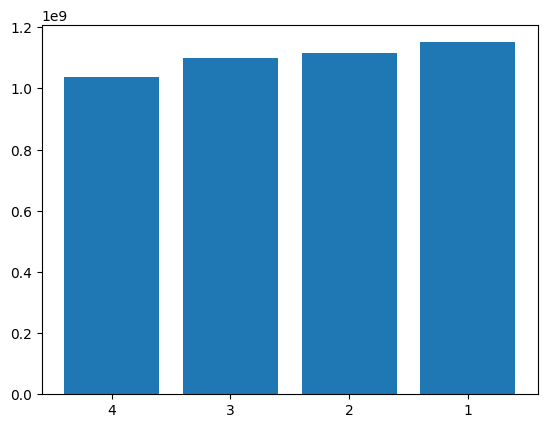

In [57]:
plt.bar(x=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Tiendas'], height=tabla_informacion_tiendas.sort_values(by="Ingresos totales")['Ingresos totales'])
plt.show()

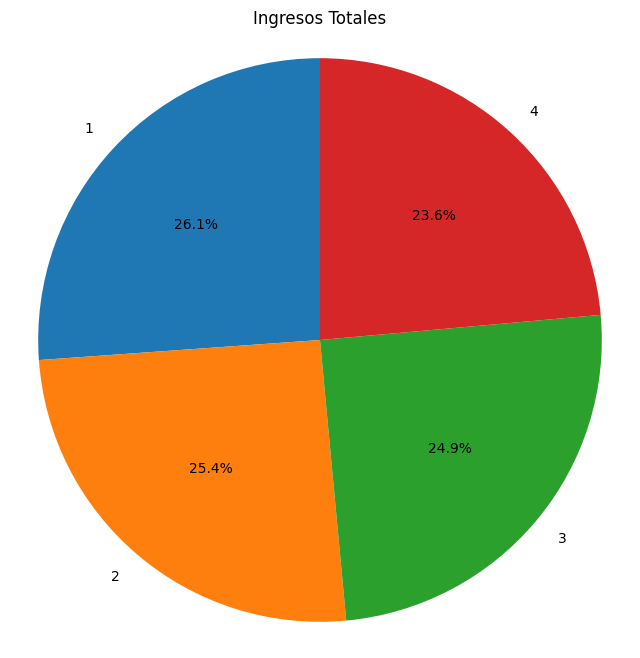

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(tabla_informacion_tiendas['Ingresos totales'],
        labels=tabla_informacion_tiendas['Tiendas'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Totales')
plt.axis('equal')
plt.show()

In [28]:
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# 2. Ventas por categoría

In [34]:
cantidad_ventas_categoria_tienda1 = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda1 = cantidad_ventas_categoria_tienda1.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda1

,Categoría del Producto,Cantidad Vendida
7,Muebles,465
3,Electrónicos,448
5,Juguetes,324
2,Electrodomésticos,312
1,Deportes y diversión,284
4,Instrumentos musicales,182
6,Libros,173
0,Artículos para el hogar,171


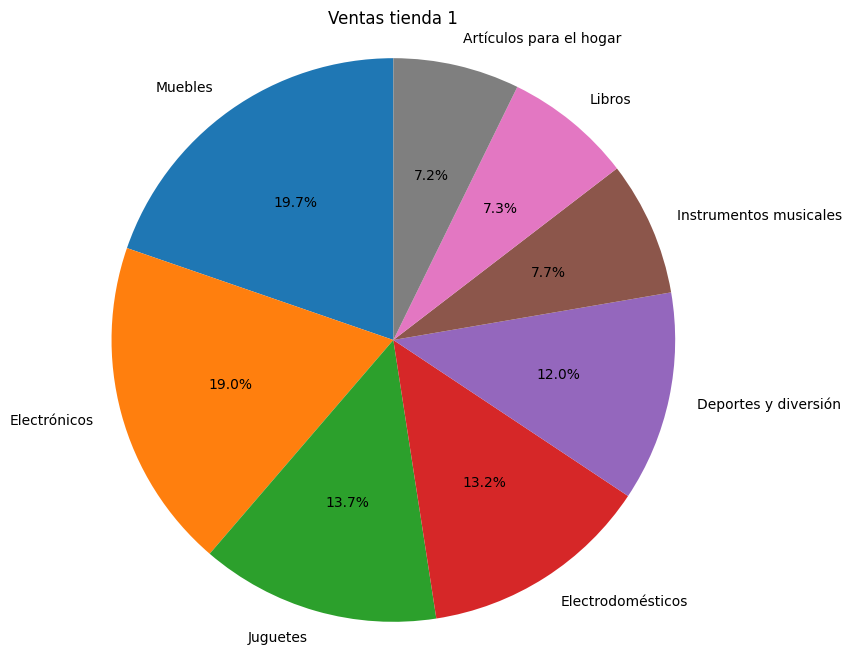

In [37]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda1['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda1['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 1')
plt.axis('equal')
plt.show()

In [38]:
cantidad_ventas_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda2 = cantidad_ventas_categoria_tienda2.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda2

,Categoría del Producto,Cantidad Vendida
7,Muebles,442
3,Electrónicos,422
5,Juguetes,313
2,Electrodomésticos,305
1,Deportes y diversión,275
4,Instrumentos musicales,224
6,Libros,197
0,Artículos para el hogar,181


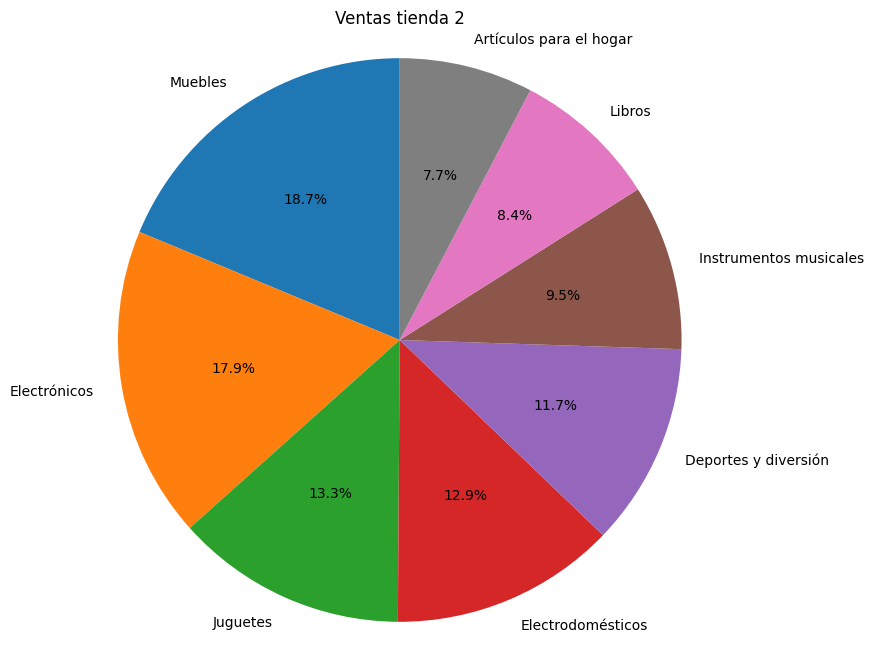

In [39]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda2['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda2['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 2')
plt.axis('equal')
plt.show()

In [40]:
cantidad_ventas_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda3 = cantidad_ventas_categoria_tienda3.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda3

,Categoría del Producto,Cantidad Vendida
7,Muebles,499
3,Electrónicos,451
5,Juguetes,315
2,Electrodomésticos,278
1,Deportes y diversión,277
6,Libros,185
0,Artículos para el hogar,177
4,Instrumentos musicales,177


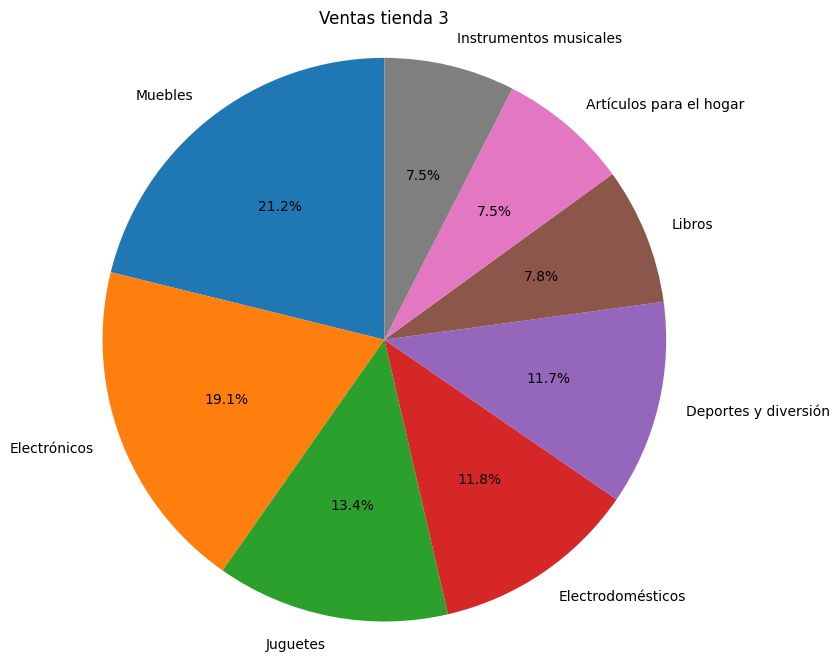

In [41]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda3['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda3['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 3')
plt.axis('equal')
plt.show()

In [43]:
cantidad_ventas_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tienda4 = cantidad_ventas_categoria_tienda4.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tienda4

,Categoría del Producto,Cantidad Vendida
7,Muebles,480
3,Electrónicos,451
5,Juguetes,338
1,Deportes y diversión,277
2,Electrodomésticos,254
0,Artículos para el hogar,201
6,Libros,187
4,Instrumentos musicales,170


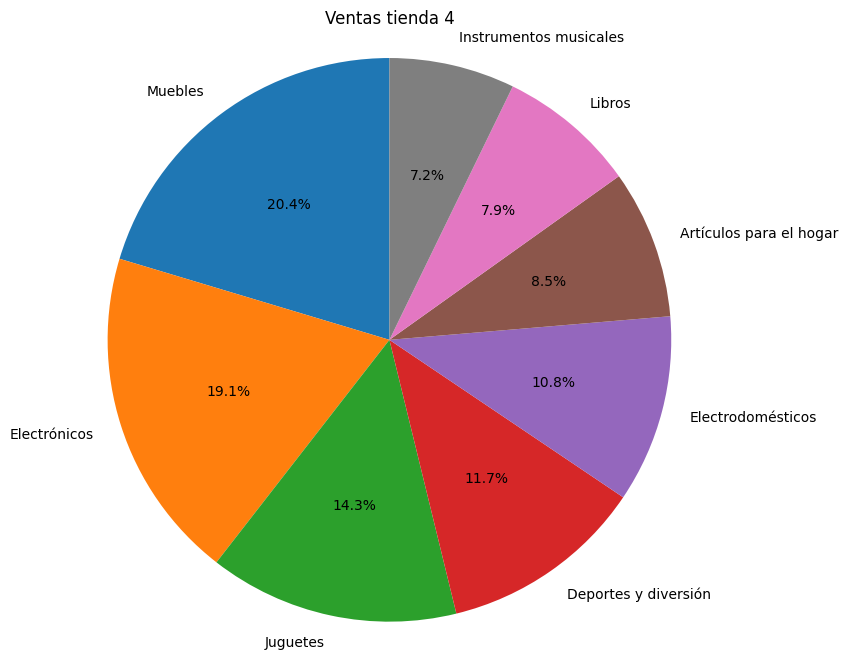

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tienda4['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tienda4['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas tienda 4')
plt.axis('equal')
plt.show()

In [49]:
cantidad_ventas_categoria_tiendas = tiendas.groupby('Categoría del Producto').size().reset_index(name='Cantidad Vendida')
cantidad_ventas_categoria_tiendas = cantidad_ventas_categoria_tiendas.sort_values(by='Cantidad Vendida', ascending=False)
cantidad_ventas_categoria_tiendas

,Categoría del Producto,Cantidad Vendida
7,Muebles,1886
3,Electrónicos,1772
5,Juguetes,1290
2,Electrodomésticos,1149
1,Deportes y diversión,1113
4,Instrumentos musicales,753
6,Libros,742
0,Artículos para el hogar,730


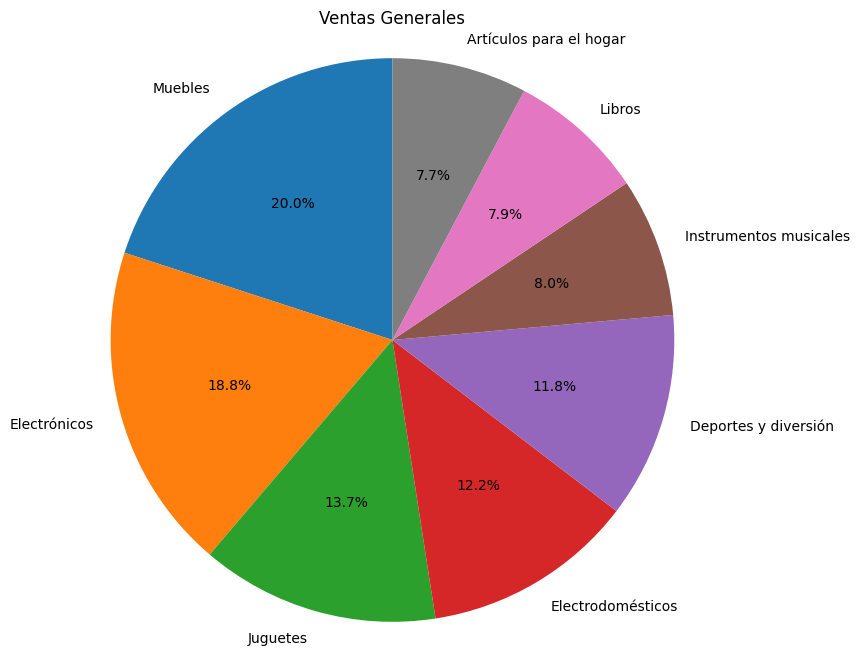

In [50]:
plt.figure(figsize=(8, 8))
plt.pie(cantidad_ventas_categoria_tiendas['Cantidad Vendida'],
        labels=cantidad_ventas_categoria_tiendas['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ventas Generales')
plt.axis('equal')
plt.show()

In [32]:
ventas_categoria_tienda1= tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda1 = ventas_categoria_tienda1.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda1

,Categoría del Producto,Precio
3,Electrónicos,429493500.0
2,Electrodomésticos,363685200.0
7,Muebles,187633700.0
4,Instrumentos musicales,91299000.0
1,Deportes y diversión,39290000.0
5,Juguetes,17995700.0
0,Artículos para el hogar,12698400.0
6,Libros,8784900.0


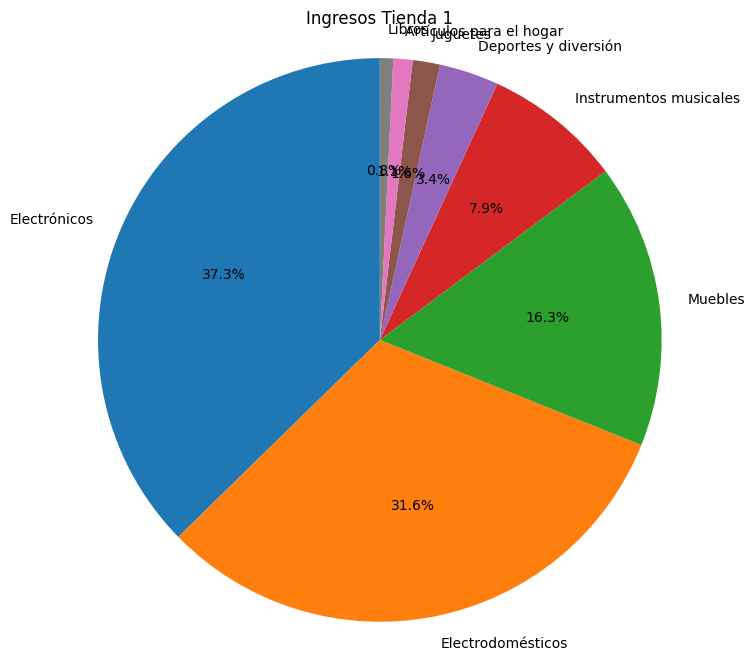

In [36]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda1['Precio'],
        labels=ventas_categoria_tienda1['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 1')
plt.axis('equal')
plt.show()


In [19]:
ventas_categoria_tienda2= tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda2 = ventas_categoria_tienda2.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda2

,Categoría del Producto,Precio
3,Electrónicos,410831100.0
2,Electrodomésticos,348567800.0
7,Muebles,176426300.0
4,Instrumentos musicales,104990300.0
1,Deportes y diversión,34744500.0
5,Juguetes,15945400.0
0,Artículos para el hogar,14746900.0
6,Libros,10091200.0


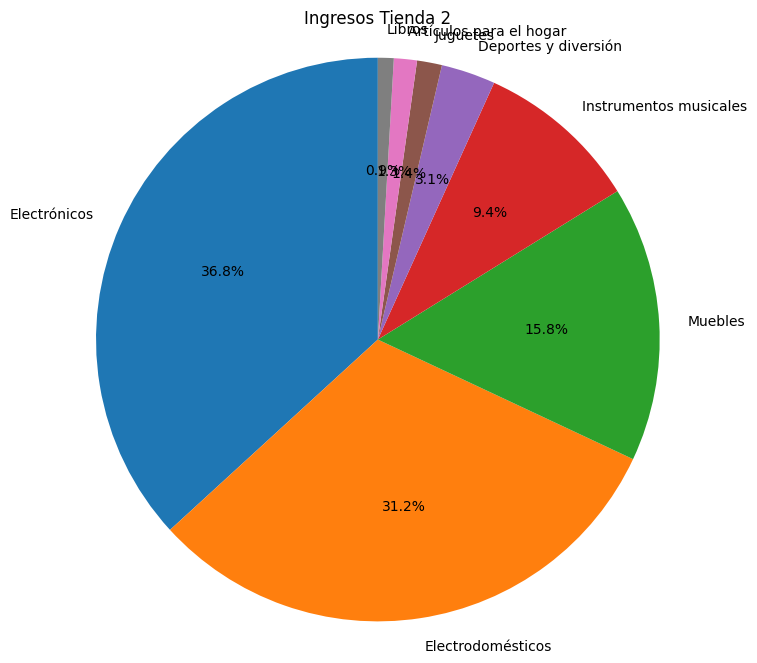

In [45]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda2['Precio'],
        labels=ventas_categoria_tienda2['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 2')
plt.axis('equal')
plt.show()

In [20]:
ventas_categoria_tienda3= tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda3 = ventas_categoria_tienda3.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda3

,Categoría del Producto,Precio
3,Electrónicos,410775800.0
2,Electrodomésticos,329237900.0
7,Muebles,201072100.0
4,Instrumentos musicales,77380900.0
1,Deportes y diversión,35593100.0
5,Juguetes,19401100.0
0,Artículos para el hogar,15060000.0
6,Libros,9498700.0


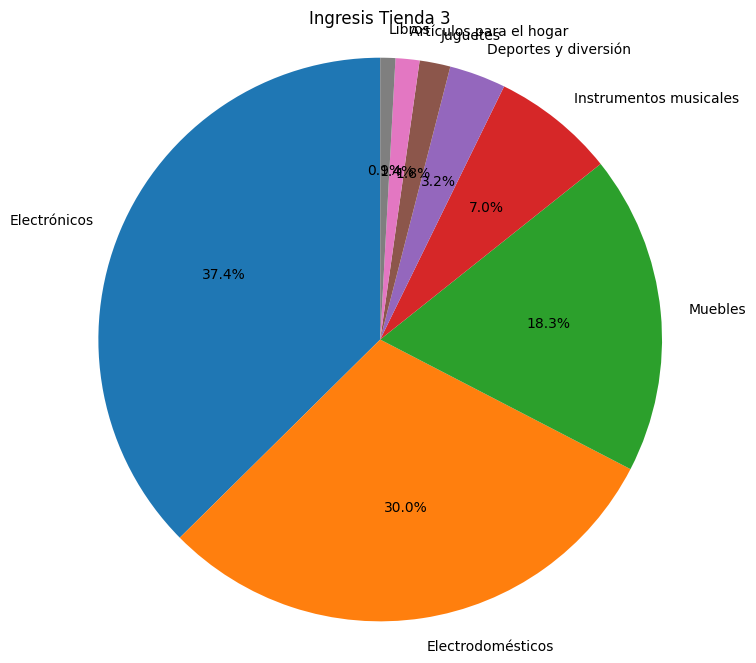

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda3['Precio'],
        labels=ventas_categoria_tienda3['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresis Tienda 3')
plt.axis('equal')
plt.show()

In [21]:
ventas_categoria_tienda4= tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tienda4 = ventas_categoria_tienda4.sort_values(by='Precio', ascending=False)
ventas_categoria_tienda4

,Categoría del Producto,Precio
3,Electrónicos,409476100.0
2,Electrodomésticos,283260200.0
7,Muebles,192528900.0
4,Instrumentos musicales,75102400.0
1,Deportes y diversión,33350100.0
5,Juguetes,20262200.0
0,Artículos para el hogar,15074500.0
6,Libros,9321300.0


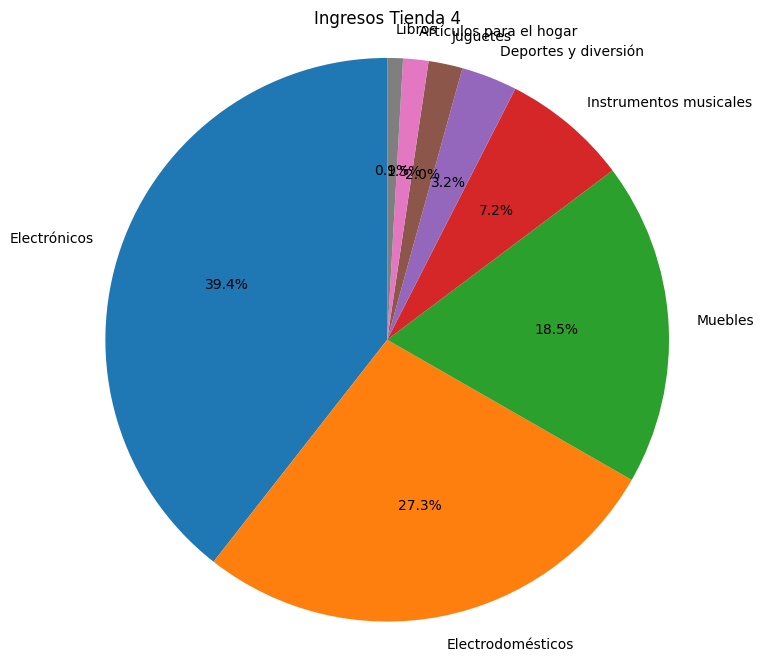

In [47]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tienda4['Precio'],
        labels=ventas_categoria_tienda4['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Tienda 4')
plt.axis('equal')
plt.show()

In [29]:
ventas_categoria_tiendas= tiendas.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ventas_categoria_tiendas = ventas_categoria_tiendas.sort_values(by='Precio', ascending=False)
ventas_categoria_tiendas

,Categoría del Producto,Precio
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


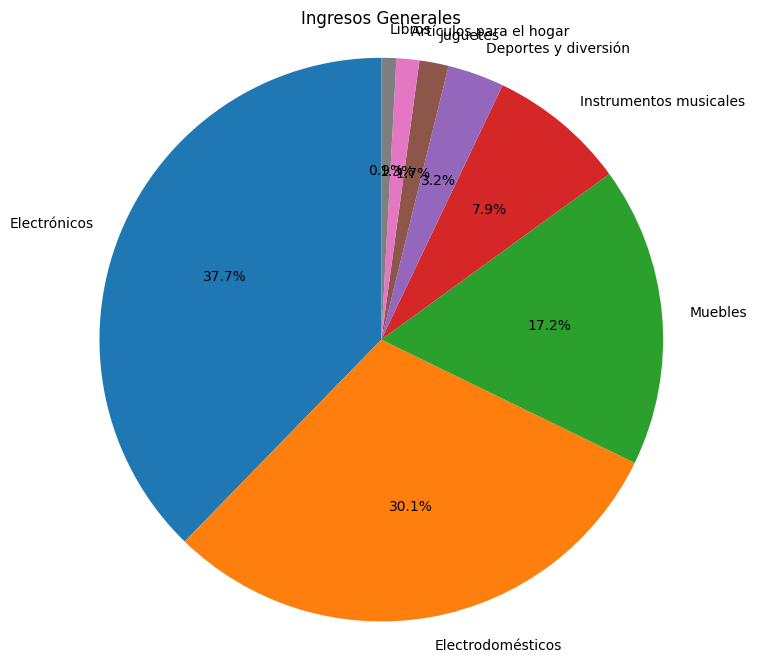

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_tiendas['Precio'],
        labels=ventas_categoria_tiendas['Categoría del Producto'],
        autopct='%1.1f%%',
        startangle=90)

plt.title('Ingresos Generales')
plt.axis('equal')
plt.show()

# 3. Calificación promedio de la tienda


In [65]:
valoraciones_promedio_tienda1= tienda.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda1= valoraciones_promedio_tienda1.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda1

,Categoría del Producto,Calificación
0,Artículos para el hogar,3.748538
1,Deportes y diversión,3.897887
7,Muebles,3.946237
6,Libros,3.976879
3,Electrónicos,4.004464
2,Electrodomésticos,4.032051
4,Instrumentos musicales,4.049451
5,Juguetes,4.077160


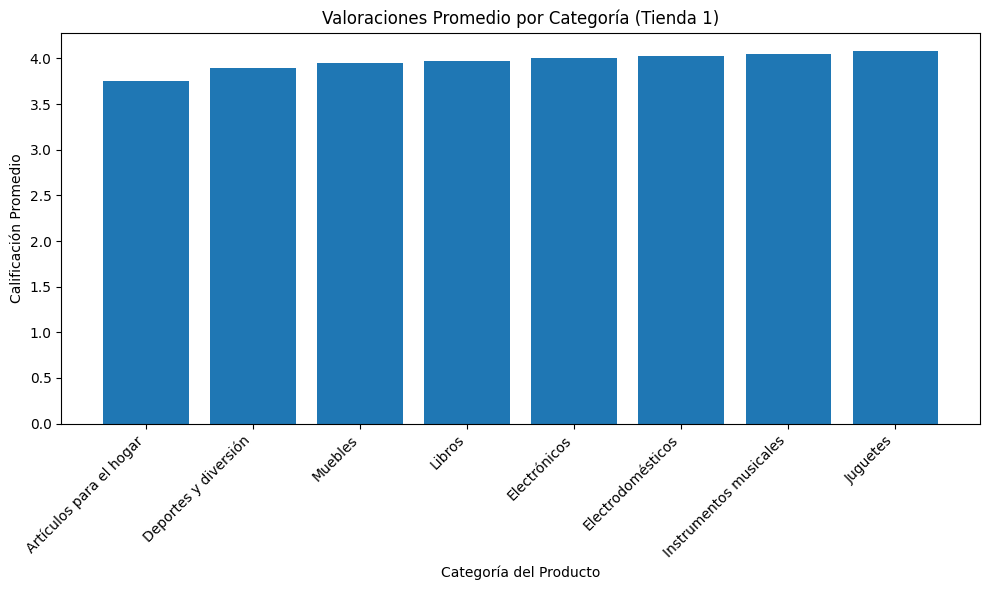

In [66]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda1['Categoría del Producto'],
        height=valoraciones_promedio_tienda1['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 1)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [68]:
valoraciones_promedio_tienda2= tienda2.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda2= valoraciones_promedio_tienda2.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda2

,Categoría del Producto,Calificación
6,Libros,3.949239
3,Electrónicos,3.971564
5,Juguetes,4.025559
4,Instrumentos musicales,4.035714
1,Deportes y diversión,4.065455
0,Artículos para el hogar,4.071823
2,Electrodomésticos,4.072131
7,Muebles,4.092760


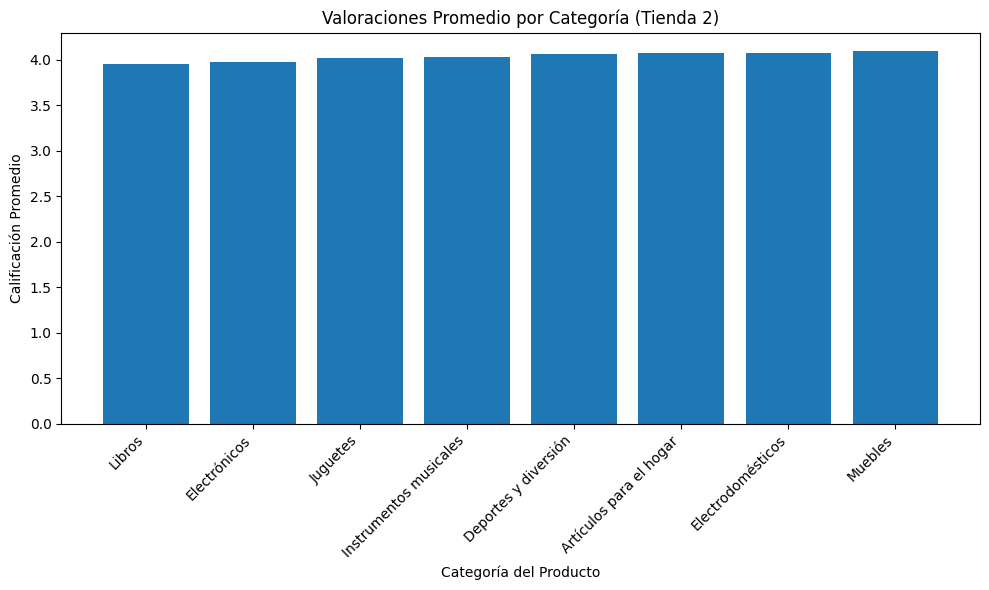

In [69]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda2['Categoría del Producto'],
        height=valoraciones_promedio_tienda2['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 2)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [70]:
valoraciones_promedio_tienda3= tienda3.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda3= valoraciones_promedio_tienda3.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda3

,Categoría del Producto,Calificación
1,Deportes y diversión,3.938628
3,Electrónicos,3.986696
4,Instrumentos musicales,4.005650
2,Electrodomésticos,4.010791
6,Libros,4.048649
0,Artículos para el hogar,4.073446
7,Muebles,4.098196
5,Juguetes,4.196825


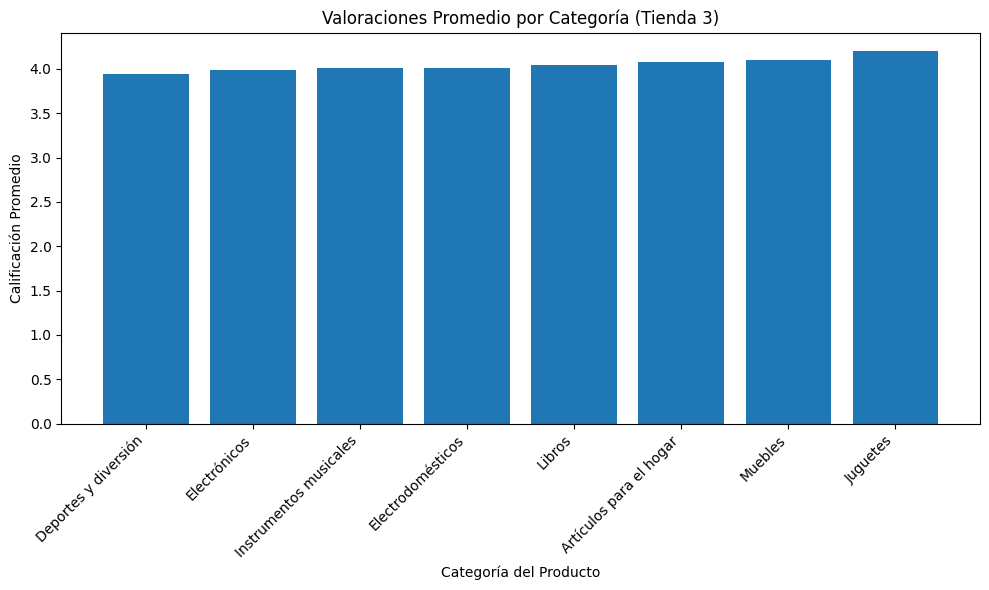

In [71]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda3['Categoría del Producto'],
        height=valoraciones_promedio_tienda3['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 3)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [72]:
valoraciones_promedio_tienda4= tienda4.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tienda4= valoraciones_promedio_tienda4.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tienda4

,Categoría del Producto,Calificación
4,Instrumentos musicales,3.911765
2,Electrodomésticos,3.929134
5,Juguetes,3.988166
7,Muebles,3.997917
3,Electrónicos,4.006652
0,Artículos para el hogar,4.009950
6,Libros,4.042781
1,Deportes y diversión,4.054152


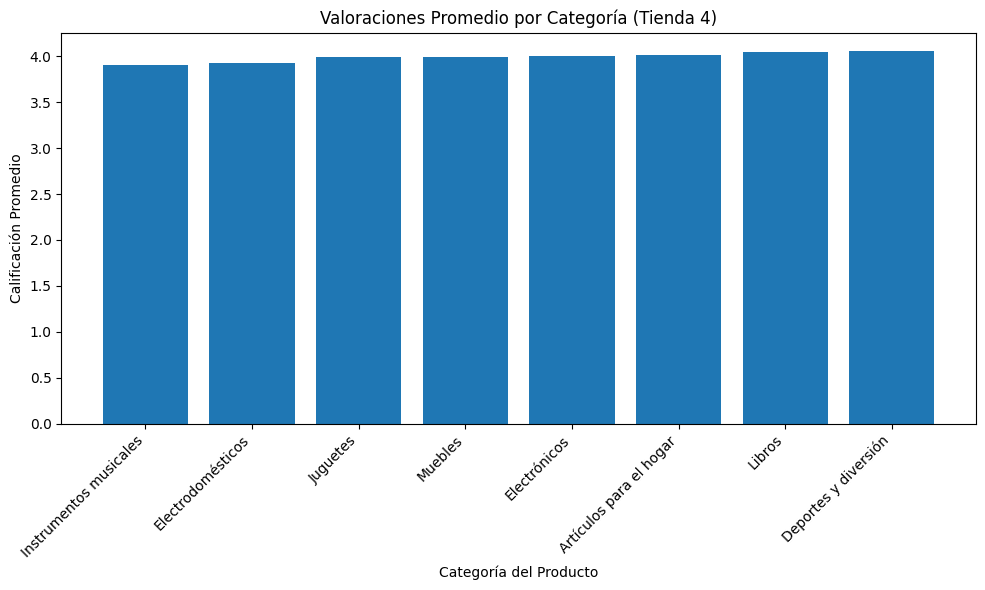

In [73]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tienda4['Categoría del Producto'],
        height=valoraciones_promedio_tienda4['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría (Tienda 4)')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [74]:
valoraciones_promedio_tiendas= tiendas.groupby('Categoría del Producto')['Calificación'].mean().reset_index()
valoraciones_promedio_tiendas= valoraciones_promedio_tiendas.sort_values(by='Calificación', ascending=True)
valoraciones_promedio_tiendas

,Categoría del Producto,Calificación
0,Artículos para el hogar,3.979452
1,Deportes y diversión,3.988320
3,Electrónicos,3.992664
4,Instrumentos musicales,4.003984
6,Libros,4.004043
2,Electrodomésticos,4.014795
7,Muebles,4.033934
5,Juguetes,4.070543


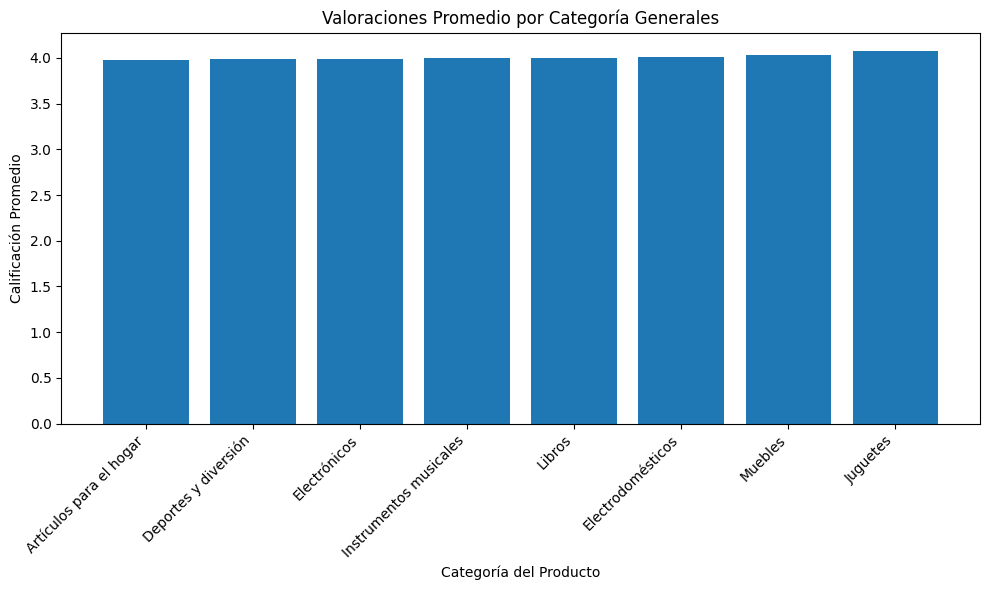

In [75]:
plt.figure(figsize=(10, 6))

plt.bar(x=valoraciones_promedio_tiendas['Categoría del Producto'],
        height=valoraciones_promedio_tiendas['Calificación'])

plt.xticks(rotation=45, ha='right')

plt.title('Valoraciones Promedio por Categoría Generales')
plt.xlabel('Categoría del Producto')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

In [78]:
calificacion_promedio_tienda1=tienda['Calificación'].mean()
calificacion_promedio_tienda2=tienda2['Calificación'].mean()
calificacion_promedio_tienda3=tienda3['Calificación'].mean()
calificacion_promedio_tienda4=tienda4['Calificación'].mean()
calificaion_promedio_tiendas = {
    "Tiendas": ["1", "2", "3", "4"],
    "Valoracion": [calificacion_promedio_tienda1, calificacion_promedio_tienda2, calificacion_promedio_tienda3, calificacion_promedio_tienda4]
}

tabla_valoracion_tiendas = pd.DataFrame(calificaion_promedio_tiendas)
tabla_valoracion_tiendas.sort_values(by="Valoracion")

,Tiendas,Valoracion
0,1,3.976685
3,4,3.995759
1,2,4.037304
2,3,4.048326


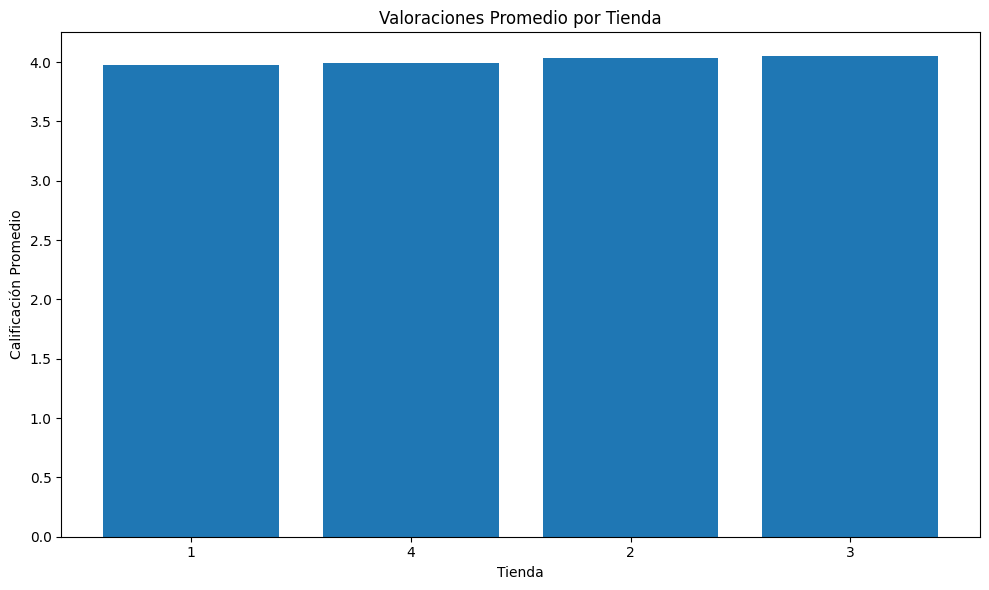

In [81]:
plt.figure(figsize=(10, 6))

plt.bar(x=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Tiendas'],
        height=tabla_valoracion_tiendas.sort_values(by="Valoracion")['Valoracion'])

plt.title('Valoraciones Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda

# New Section